# Tabular Playground Series Competition

**Import libraries**

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# preprocessing data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# algorithms 
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

**Reading Data using Pandas**

In [ ]:
# Train Dataset 
train = pd.read_csv('../input/tabular-playground-series-may-2022/train.csv')

# Test  Dataset 
test = pd.read_csv('../input/tabular-playground-series-may-2022/test.csv')

# submission
sample_submission = pd.read_csv('../input/tabular-playground-series-may-2022/sample_submission.csv')

**Data Visualization:**

Let's get some basic insights

In [ ]:
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
target_title = "0 = {} , 1 = {}".format(train['target'].value_counts()[0],train['target'].value_counts()[1])

In [ ]:
plt.figure()
sns.histplot(train['target'])
plt.title(target_title)
plt.show()

**Checking info of features**

In [ ]:
train.info()

In [ ]:
train.describe().T.style.bar(subset=['mean'], color='yellow').background_gradient(subset=['std'], cmap='Spectral')

In [ ]:
test.describe().T.style.bar(subset=['mean'], color='yellow').background_gradient(subset=['std'], cmap='Spectral_r')

In [ ]:
#check null values 
train.isna().sum()

In [ ]:
test.isna().sum()

In [ ]:
train.nunique()

**Observations:**

* We can see that there are 16 columns are of type (float), another 16 are of type (int) and 1 is of type (object).
* There are a total of 900000 Rows and 33 Columns.
* f_07, f_18, f_29 and f_30 are discrete variables from range 1-16.
* f_27 has a sequence of alphabets of 10 letters.
* There are no missing values.

In [ ]:
corr = train.corr()

plt.figure(figsize=(16,9))
sns.heatmap(corr,vmin=-0.5,vmax=1)

We can see from this heatmap, there are some correlation among the features.

In [ ]:
y = train.target
X = train.drop('target', axis=1, inplace=False).copy()

In [ ]:
features = len(X.columns.to_list())

In [ ]:
Encoder = LabelEncoder()

f_27 = Encoder.fit_transform(X['f_27'])
X['f_27'] = f_27

f_27_test = Encoder.fit_transform(test['f_27'])
test['f_27'] = f_27_test


In [ ]:
X = StandardScaler().fit_transform(X)
test = StandardScaler().fit_transform(test)

**Keras Model**

The model is sequential and has five hidden layers. To counter overfitting, I added a kernel_regularizer to all hidden layers. As you can see, I added BatchNormalization and Dropout between layers.

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(750, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), activation="relu",input_shape=(features,)))
model.add(BatchNormalization())

model.add(Dense(512, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(200,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(60,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(16,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), activation="relu"))

model.add(Dense(1,activation='sigmoid'))

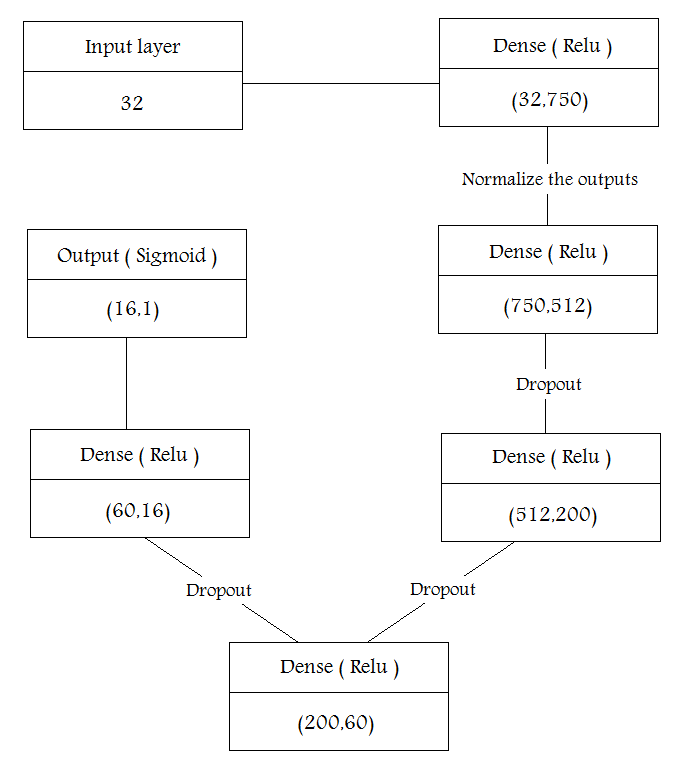

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['AUC'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [ ]:
model.fit(X, y, validation_split=0.3, shuffle=True, epochs=90,batch_size=1500,callbacks=[callback])

In [ ]:
y_pred = model.predict(test)

**Submission**

In [ ]:
sample_submission['target'] = y_pred
sample_submission.to_csv('submission.csv', index=False)

In [ ]:
sample_submission